In [ ]:
#CODE_1

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


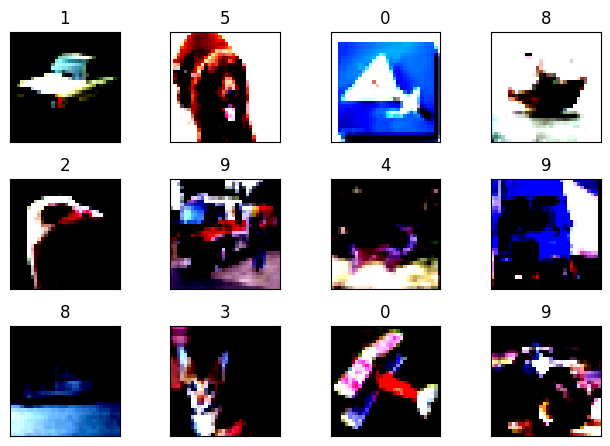

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
# os['KMP_DUPLICATE_LIB_OK']='True'
# CUDA?
cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)
# Train data transformations

train_transforms = transforms.Compose([
    # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # transforms.Resize((28, 28)),
    # transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

train_data = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10(
    root='./data', train=False, download=True, transform=test_transforms)

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
class_map = {
    'ZERO': 0,
    'ONE': 1,
    'TWO': 2,
    'THREE': 3,
    'FOUR': 4,
    'FIVE': 5,
    'SIX': 6,
    'SEVEN': 7,
    'EIGHT': 8,
    'NINE': 9
}
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [3]:
!pip install torchsummary
from model import Net_GN,train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net_GN().to(device)
model_summary(model, (3,32,32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
         GroupNorm-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 20, 28, 28]           2,880
              ReLU-6           [-1, 20, 28, 28]               0
         GroupNorm-7           [-1, 20, 28, 28]              40
           Dropout-8           [-1, 20, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]             320
        MaxPool2d-10           [-1, 16, 14, 14]               0
           Conv2d-11           [-1, 20, 14, 14]           2,880
             ReLU-12           [-1, 20, 14, 14]               0
    

In [4]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=7)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=15, steps_per_epoch=len(train_loader))
criterion = nn.CrossEntropyLoss()
num_epochs = 15

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion,scheduler)
  test(model, device, test_loader)
  # scheduler.step(tl)

Loss=1.955991268157959 Batch_id=97 Accuracy=19.05: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 1.8760, Accuracy: 3054/10000 (30.54%)



Loss=1.4547191858291626 Batch_id=97 Accuracy=37.77: 100%|██████████| 98/98 [00:14<00:00,  6.72it/s]



Test set: Average loss: 1.5515, Accuracy: 4326/10000 (43.26%)



Loss=1.2439395189285278 Batch_id=97 Accuracy=47.58: 100%|██████████| 98/98 [00:15<00:00,  6.16it/s]



Test set: Average loss: 1.3193, Accuracy: 5242/10000 (52.42%)



Loss=1.1944342851638794 Batch_id=97 Accuracy=53.96: 100%|██████████| 98/98 [00:14<00:00,  6.61it/s]



Test set: Average loss: 1.2177, Accuracy: 5627/10000 (56.27%)



Loss=1.113728642463684 Batch_id=97 Accuracy=59.28: 100%|██████████| 98/98 [00:14<00:00,  6.59it/s]



Test set: Average loss: 1.0826, Accuracy: 6098/10000 (60.98%)



Loss=0.9162984490394592 Batch_id=97 Accuracy=63.07: 100%|██████████| 98/98 [00:15<00:00,  6.14it/s]



Test set: Average loss: 1.0074, Accuracy: 6429/10000 (64.29%)



Loss=0.9299824237823486 Batch_id=97 Accuracy=65.83: 100%|██████████| 98/98 [00:14<00:00,  6.60it/s]



Test set: Average loss: 0.9648, Accuracy: 6620/10000 (66.20%)



Loss=0.8925380706787109 Batch_id=97 Accuracy=68.79: 100%|██████████| 98/98 [00:14<00:00,  6.64it/s]



Test set: Average loss: 0.9033, Accuracy: 6832/10000 (68.32%)



Loss=0.7583126425743103 Batch_id=97 Accuracy=70.51: 100%|██████████| 98/98 [00:14<00:00,  6.57it/s]



Test set: Average loss: 0.8628, Accuracy: 6979/10000 (69.79%)



Loss=0.8777117133140564 Batch_id=97 Accuracy=72.00: 100%|██████████| 98/98 [00:15<00:00,  6.27it/s]



Test set: Average loss: 0.8383, Accuracy: 7035/10000 (70.35%)



Loss=0.7468241453170776 Batch_id=97 Accuracy=73.93: 100%|██████████| 98/98 [00:14<00:00,  6.62it/s]



Test set: Average loss: 0.8055, Accuracy: 7203/10000 (72.03%)



Loss=0.6449887156486511 Batch_id=97 Accuracy=75.39: 100%|██████████| 98/98 [00:15<00:00,  6.53it/s]



Test set: Average loss: 0.7785, Accuracy: 7338/10000 (73.38%)



Loss=0.664828896522522 Batch_id=97 Accuracy=76.64: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]



Test set: Average loss: 0.7742, Accuracy: 7326/10000 (73.26%)



Loss=0.6017630696296692 Batch_id=97 Accuracy=77.71: 100%|██████████| 98/98 [00:14<00:00,  6.57it/s]



Test set: Average loss: 0.7576, Accuracy: 7390/10000 (73.90%)



Loss=0.5989869832992554 Batch_id=97 Accuracy=78.59: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]



Test set: Average loss: 0.7549, Accuracy: 7418/10000 (74.18%)



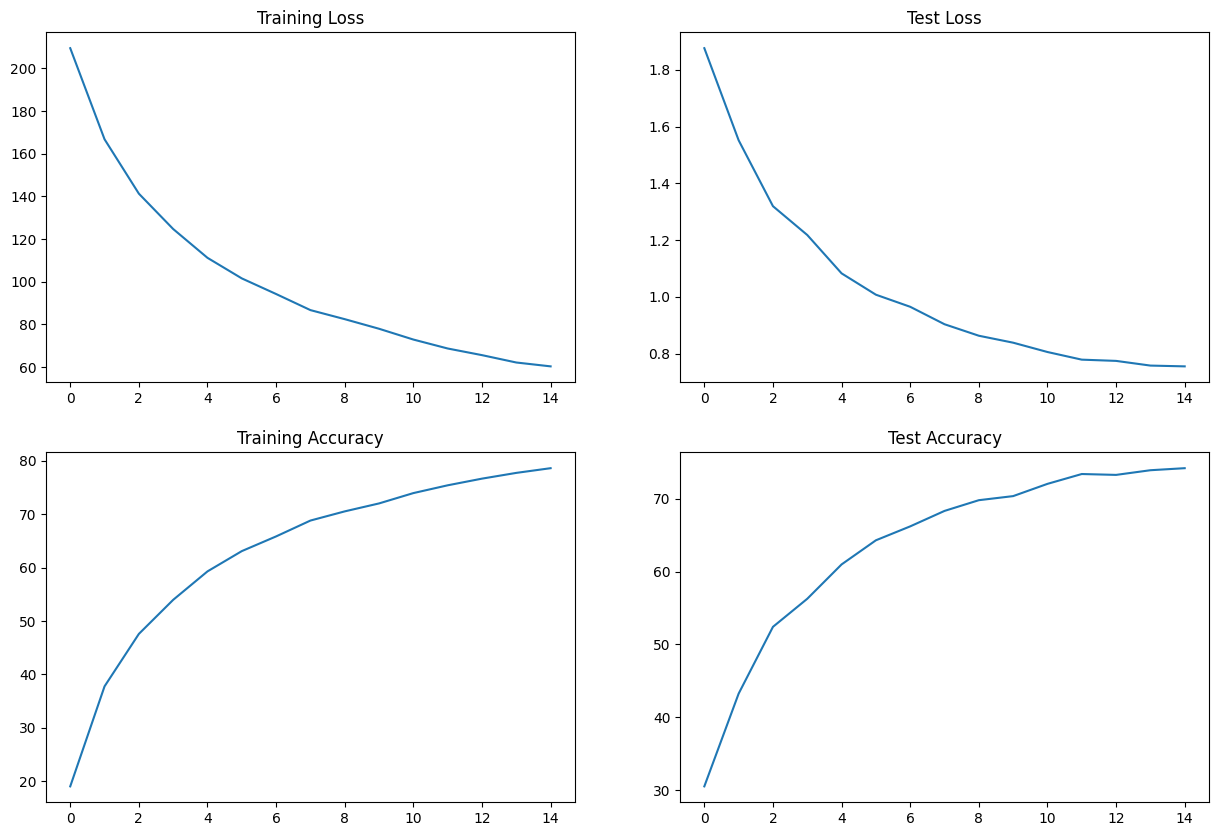

In [5]:
from model import draw_graphs
draw_graphs()

In [ ]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions

Total Incorrect Predictions 2582


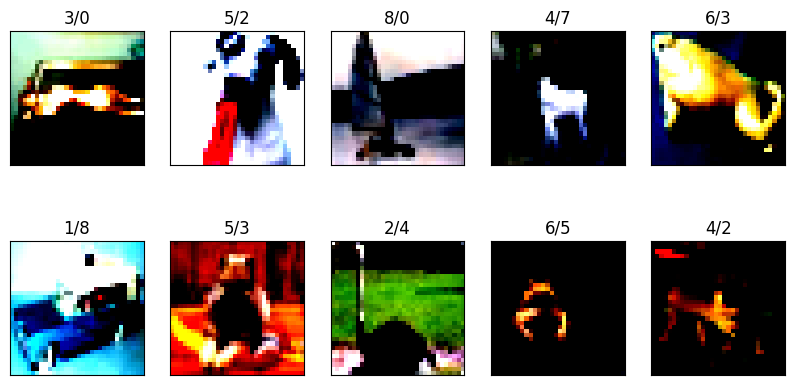

In [9]:
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)